In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [6]:
df =  pd.read_csv("Medicaid.csv")
df

,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2019,Tot_Dsg_Unts_2019,Tot_Clms_2019,Avg_Spnd_Per_Dsg_Unt_Wghtd_2019,Avg_Spnd_Per_Clm_2019,Outlier_Flag_2019,...,Avg_Spnd_Per_Clm_2022,Outlier_Flag_2022,Tot_Spndng_2023,Tot_Dsg_Unts_2023,Tot_Clms_2023,Avg_Spnd_Per_Dsg_Unt_Wghtd_2023,Avg_Spnd_Per_Clm_2023,Outlier_Flag_2023,Chg_Avg_Spnd_Per_Dsg_Unt_22_23,CAGR_Avg_Spnd_Per_Dsg_Unt_19_23
0,A And D,Vits A And D/White Pet/Lanolin,1,Overall,79.36,1102.000,17.0,0.072015,4.668235,1.0,...,16.841176,1.0,144.15,410.500,11,0.351157,13.104545,1,1.494382,0.486005
1,A And D,Vits A And D/White Pet/Lanolin,1,Bayer Healthcar,79.36,1102.000,17.0,0.072015,4.668235,1.0,...,16.841176,1.0,144.15,410.500,11,0.351157,13.104545,1,0.365747,0.486005
2,A-Methapred,Methylprednisolone Sod Succ,1,Overall,307577.38,270.125,172.0,1418.711295,1788.240581,1.0,...,353.986154,1.0,670.12,30.000,26,22.857212,25.773846,1,-0.439531,-0.643727
3,A-Methapred,Methylprednisolone Sod Succ,1,Hospira,307577.38,270.125,172.0,1418.711295,1788.240581,1.0,...,353.986154,1.0,670.12,30.000,26,22.857212,25.773846,1,-0.845664,-0.643727
4,Abacavir,Abacavir Sulfate,6,Overall,2350109.90,1580509.000,15259.0,2.274885,154.014673,0.0,...,129.811932,0.0,668314.44,751733.200,6110,1.406971,109.380432,0,-0.052327,-0.113188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16933,Zyvox,Linezolid,1,Pharmacia-Upjhn,183027.08,17270.000,56.0,80.667114,3268.340714,1.0,...,950.531111,1.0,39929.38,6174.000,36,26.967323,1109.149444,1,0.009304,-0.239612
16934,Zyvox,Linezolid In Dextrose 5%,3,Overall,149429.76,732910.000,691.0,0.198587,216.251462,0.0,...,179.070506,0.0,155640.50,3993819.175,762,0.109873,204.252625,0,0.024083,-0.137548
16935,Zyvox,Linezolid In Dextrose 5%,1,Pharmacia-Upjhn,99783.53,452881.000,363.0,0.218596,274.885758,0.0,...,200.704624,0.0,91583.67,3723202.175,460,0.024598,199.094935,0,-0.910776,-0.420818
16936,Zyvox,Linezolid In Dextrose 5%,1,Pharmacia-Uj-No,24903.72,123138.000,138.0,0.202242,180.461739,0.0,...,73.278889,1.0,2982.21,10830.000,35,0.275366,85.206000,1,1.591613,0.080213


In [7]:
df.head()

,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2019,Tot_Dsg_Unts_2019,Tot_Clms_2019,Avg_Spnd_Per_Dsg_Unt_Wghtd_2019,Avg_Spnd_Per_Clm_2019,Outlier_Flag_2019,...,Avg_Spnd_Per_Clm_2022,Outlier_Flag_2022,Tot_Spndng_2023,Tot_Dsg_Unts_2023,Tot_Clms_2023,Avg_Spnd_Per_Dsg_Unt_Wghtd_2023,Avg_Spnd_Per_Clm_2023,Outlier_Flag_2023,Chg_Avg_Spnd_Per_Dsg_Unt_22_23,CAGR_Avg_Spnd_Per_Dsg_Unt_19_23
0,A And D,Vits A And D/White Pet/Lanolin,1,Overall,79.36,1102.000,17.0,0.072015,4.668235,1.0,...,16.841176,1.0,144.15,410.5,11,0.351157,13.104545,1,1.494382,0.486005
1,A And D,Vits A And D/White Pet/Lanolin,1,Bayer Healthcar,79.36,1102.000,17.0,0.072015,4.668235,1.0,...,16.841176,1.0,144.15,410.5,11,0.351157,13.104545,1,0.365747,0.486005
2,A-Methapred,Methylprednisolone Sod Succ,1,Overall,307577.38,270.125,172.0,1418.711295,1788.240581,1.0,...,353.986154,1.0,670.12,30.0,26,22.857212,25.773846,1,-0.439531,-0.643727
3,A-Methapred,Methylprednisolone Sod Succ,1,Hospira,307577.38,270.125,172.0,1418.711295,1788.240581,1.0,...,353.986154,1.0,670.12,30.0,26,22.857212,25.773846,1,-0.845664,-0.643727
4,Abacavir,Abacavir Sulfate,6,Overall,2350109.90,1580509.000,15259.0,2.274885,154.014673,0.0,...,129.811932,0.0,668314.44,751733.2,6110,1.406971,109.380432,0,-0.052327,-0.113188


In [9]:
df.describe()

,Tot_Mftr,Tot_Spndng_2019,Tot_Dsg_Unts_2019,Tot_Clms_2019,Avg_Spnd_Per_Dsg_Unt_Wghtd_2019,Avg_Spnd_Per_Clm_2019,Outlier_Flag_2019,Tot_Spndng_2020,Tot_Dsg_Unts_2020,Tot_Clms_2020,...,Avg_Spnd_Per_Clm_2022,Outlier_Flag_2022,Tot_Spndng_2023,Tot_Dsg_Unts_2023,Tot_Clms_2023,Avg_Spnd_Per_Dsg_Unt_Wghtd_2023,Avg_Spnd_Per_Clm_2023,Outlier_Flag_2023,Chg_Avg_Spnd_Per_Dsg_Unt_22_23,CAGR_Avg_Spnd_Per_Dsg_Unt_19_23
count,16938.000000,1.210900e+04,1.210900e+04,1.210900e+04,1.210900e+04,1.210900e+04,12109.000000,1.310100e+04,1.310100e+04,1.310100e+04,...,1.520700e+04,15207.000000,1.693800e+04,1.693800e+04,1.693800e+04,1.693800e+04,1.693800e+04,16938.000000,15190.000000,16889.000000
mean,1.496635,1.182643e+07,6.475601e+06,1.100072e+05,4.498930e+02,1.505010e+03,0.323726,1.171321e+07,5.906893e+06,9.851674e+04,...,1.913900e+03,0.366147,1.307539e+07,5.708452e+06,8.559399e+04,9.300120e+02,2.124977e+03,0.422541,0.829452,0.183116
std,2.492384,5.740282e+07,4.295649e+07,5.402361e+05,2.110592e+04,2.004598e+04,0.467916,6.252638e+07,3.938691e+07,5.008923e+05,...,1.764521e+04,0.481766,9.595427e+07,5.555008e+07,4.894164e+05,3.763926e+04,2.301165e+04,0.493978,23.393421,7.480253
min,1.000000,1.520000e+00,4.800000e+00,1.100000e+01,1.662901e-04,1.085714e-01,0.000000,0.000000e+00,5.251000e+00,1.100000e+01,...,0.000000e+00,0.000000,0.000000e+00,1.980000e-01,1.100000e+01,0.000000e+00,0.000000e+00,0.000000,-1.000000,-0.999458
25%,1.000000,7.958192e+04,1.182335e+04,5.700000e+02,5.104737e-01,2.262909e+01,0.000000,7.311371e+04,1.040890e+04,4.660000e+02,...,2.565880e+01,0.000000,3.184133e+04,4.089500e+03,1.880000e+02,4.888565e-01,2.333047e+01,0.000000,-0.146821,-0.082554
50%,1.000000,5.433920e+05,1.233090e+05,3.869000e+03,3.163656e+00,1.001013e+02,0.000000,4.969505e+05,1.039363e+05,3.254000e+03,...,1.220404e+02,0.000000,3.293872e+05,4.955026e+04,1.764500e+03,3.424436e+00,1.110549e+02,0.000000,0.010437,0.000000
75%,1.000000,3.153560e+06,1.243479e+06,2.821900e+04,2.432861e+01,3.836834e+02,1.000000,2.958352e+06,1.091607e+06,2.406400e+04,...,5.065196e+02,1.000000,2.460497e+06,6.953936e+05,1.614600e+04,3.373063e+01,4.882003e+02,1.000000,0.129315,0.062353
max,50.000000,1.335206e+09,2.191047e+09,1.371262e+07,1.639777e+06,1.503129e+06,1.000000,1.808513e+09,2.275604e+09,1.385644e+07,...,1.297110e+06,1.000000,4.204800e+09,3.156587e+09,1.537742e+07,3.165042e+06,1.366445e+06,1.000000,2540.968015,642.907434


In [10]:
df.info

<bound method DataFrame.info of          Brnd_Name                       Gnrc_Name  Tot_Mftr        Mftr_Name  \
0          A And D  Vits A And D/White Pet/Lanolin         1          Overall   
1          A And D  Vits A And D/White Pet/Lanolin         1  Bayer Healthcar   
2      A-Methapred     Methylprednisolone Sod Succ         1          Overall   
3      A-Methapred     Methylprednisolone Sod Succ         1          Hospira   
4         Abacavir                Abacavir Sulfate         6          Overall   
...            ...                             ...       ...              ...   
16933        Zyvox                       Linezolid         1  Pharmacia-Upjhn   
16934        Zyvox        Linezolid In Dextrose 5%         3          Overall   
16935        Zyvox        Linezolid In Dextrose 5%         1  Pharmacia-Upjhn   
16936        Zyvox        Linezolid In Dextrose 5%         1  Pharmacia-Uj-No   
16937        Zyvox        Linezolid In Dextrose 5%         1  Phar-Prep/Pfize

In [12]:
df.shape

(16938, 36)

In [14]:
df['Brnd_Name'].unique()

array(['A And D', 'A-Methapred', 'Abacavir', ..., 'Zyrtec', 'Zytiga',
       'Zyvox'], dtype=object)

In [22]:
df.isnull().sum()

Brnd_Name          0
Tot_Spndng_2019    0
Tot_Spndng_2020    0
Tot_Spndng_2021    0
dtype: int64

In [23]:
df.dropna()

,Brnd_Name,Tot_Spndng_2019,Tot_Spndng_2020,Tot_Spndng_2021
0,Trulicity,1000,1200,1500
1,Ozempic,2000,2500,3000
2,Victoza,800,900,950
3,Rybelsus,700,750,800
4,Bydureon,600,650,700
5,Byetta,400,450,500
6,Mounjaro,900,1000,1200
7,Jardiance,1200,1400,1600
8,Farxiga,1500,1600,1700
9,Invokana,1100,1200,1300


In [24]:
df.isnull().sum()

Brnd_Name          0
Tot_Spndng_2019    0
Tot_Spndng_2020    0
Tot_Spndng_2021    0
dtype: int64

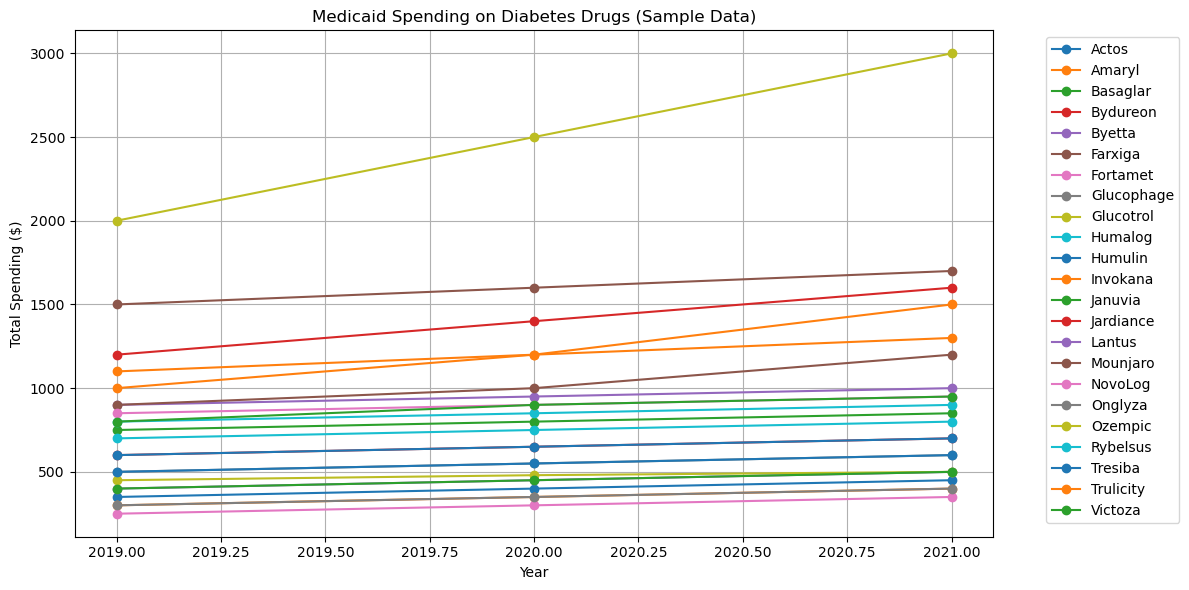

Long-format dataframe with YoY growth:
    Brnd_Name  Year  Total_Spending  YoY_Change_%
18      Actos  2019             350           NaN
41      Actos  2020             400     14.285714
64      Actos  2021             450     12.500000
22     Amaryl  2019             300           NaN
45     Amaryl  2020             350     16.666667
..        ...   ...             ...           ...
23  Trulicity  2020            1200     20.000000
46  Trulicity  2021            1500     25.000000
2     Victoza  2019             800           NaN
25    Victoza  2020             900     12.500000
48    Victoza  2021             950      5.555556

[69 rows x 4 columns]


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset with realistic placeholder spending numbers
data = {
    "Brnd_Name": [
        "Trulicity","Ozempic","Victoza","Rybelsus","Bydureon","Byetta","Mounjaro",
        "Jardiance","Farxiga","Invokana","Humalog","NovoLog","Lantus","Basaglar","Tresiba","Humulin",
        "Januvia","Onglyza","Actos","Fortamet","Glucophage","Glucotrol","Amaryl","Tylenol"
    ],
    "Tot_Spndng_2019": [
        1000, 2000, 800, 700, 600, 400, 900,
        1200, 1500, 1100, 800, 850, 900, 750, 600, 500,
        400, 300, 350, 250, 500, 450, 300, 500
    ],
    "Tot_Spndng_2020": [
        1200, 2500, 900, 750, 650, 450, 1000,
        1400, 1600, 1200, 850, 900, 950, 800, 650, 550,
        450, 350, 400, 300, 550, 480, 350, 550
    ],
    "Tot_Spndng_2021": [
        1500, 3000, 950, 800, 700, 500, 1200,
        1600, 1700, 1300, 900, 950, 1000, 850, 700, 600,
        500, 400, 450, 350, 600, 500, 400, 600
    ]
}

df = pd.DataFrame(data)

# Full list of Medicaid diabetes drugs
diabetes_brands = [
    "Trulicity","Ozempic","Victoza","Rybelsus","Bydureon","Byetta","Mounjaro",
    "Jardiance","Farxiga","Invokana",
    "Humalog","NovoLog","Lantus","Basaglar","Tresiba","Humulin",
    "Januvia","Onglyza","Actos","Fortamet","Glucophage","Glucotrol","Amaryl"
]

# Step 1: Filter only diabetes drugs
df_diabetes = df[df['Brnd_Name'].isin(diabetes_brands)]

# Step 2: Reshape from wide to long format
spending_cols = ['Tot_Spndng_2019','Tot_Spndng_2020','Tot_Spndng_2021']
df_long = df_diabetes.melt(
    id_vars=['Brnd_Name'],
    value_vars=spending_cols,
    var_name='Year',
    value_name='Total_Spending'
)

# Step 3: Clean the Year column
df_long['Year'] = df_long['Year'].str[-4:].astype(int)

# Step 4: Compute Year-over-Year (YoY) growth per drug
df_long.sort_values(['Brnd_Name','Year'], inplace=True)
df_long['YoY_Change_%'] = df_long.groupby('Brnd_Name')['Total_Spending'].pct_change() * 100

# Step 5: Plot Medicaid spending trends per drug
plt.figure(figsize=(12,6))
for drug in df_long['Brnd_Name'].unique():
    df_drug = df_long[df_long['Brnd_Name'] == drug]
    plt.plot(df_drug['Year'], df_drug['Total_Spending'], marker='o', label=drug)

plt.title("Medicaid Spending on Diabetes Drugs (Sample Data)")
plt.xlabel("Year")
plt.ylabel("Total Spending ($)")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')  # legend outside
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: View long-format dataframe
print("Long-format dataframe with YoY growth:")
print(df_long)

In [26]:
pip install prophet

   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ------------------------------------ --- 11.0/12.1 MB 75.6 MB/s eta 0:00:01
   ---------------------------------------- 12.1/12.1 MB 66.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 46.7 MB/s eta 0:00:00

   -------- ------------------------------- 1/5 [importlib_resources]
   -------- ------------------------------- 1/5 [importlib_resources]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ----------

12:44:31 - cmdstanpy - INFO - Chain [1] start processing
12:44:32 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


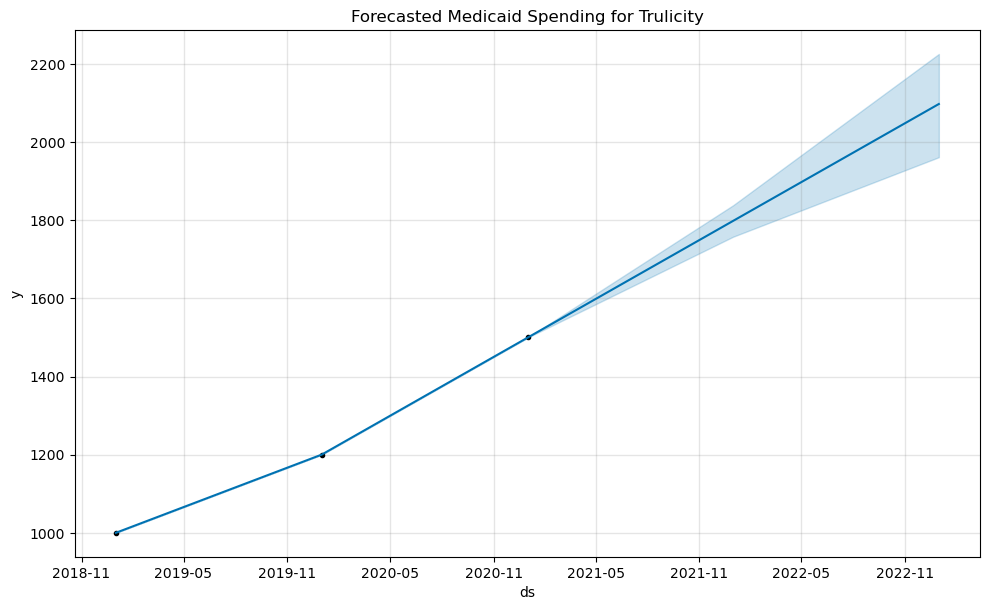

12:44:32 - cmdstanpy - INFO - Chain [1] start processing


Forecast for Trulicity (last 2 years):
          ds         yhat   yhat_lower   yhat_upper
3 2021-12-31  1798.360655  1757.777460  1838.383565
4 2022-12-31  2097.540982  1961.342365  2225.670514


12:44:34 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


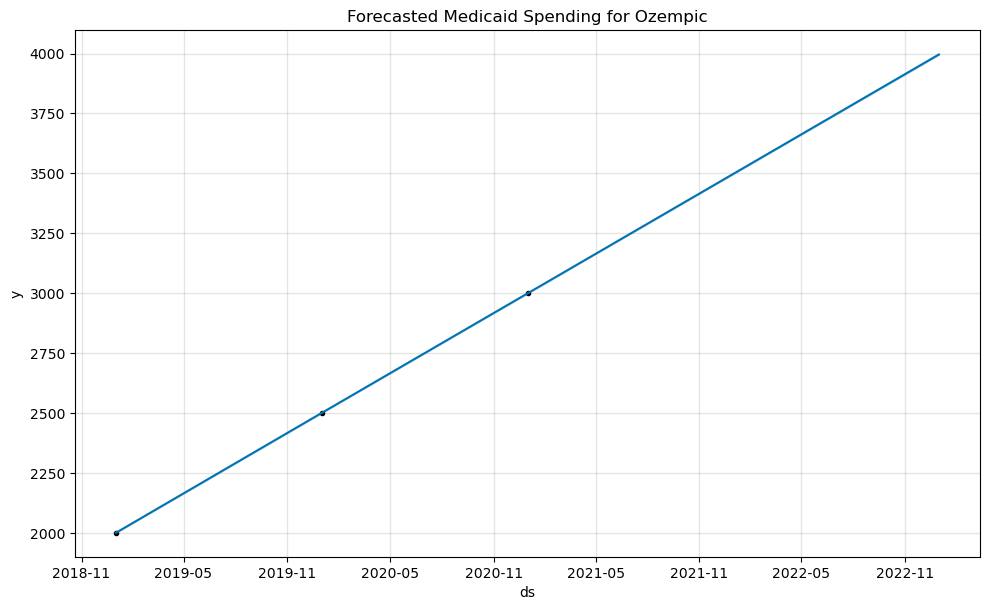

12:44:34 - cmdstanpy - INFO - Chain [1] start processing
12:44:34 - cmdstanpy - INFO - Chain [1] done processing


Forecast for Ozempic (last 2 years):
          ds         yhat   yhat_lower   yhat_upper
3 2021-12-31  3497.267750  3496.682773  3497.958857
4 2022-12-31  3995.901623  3993.866694  3998.210440


C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


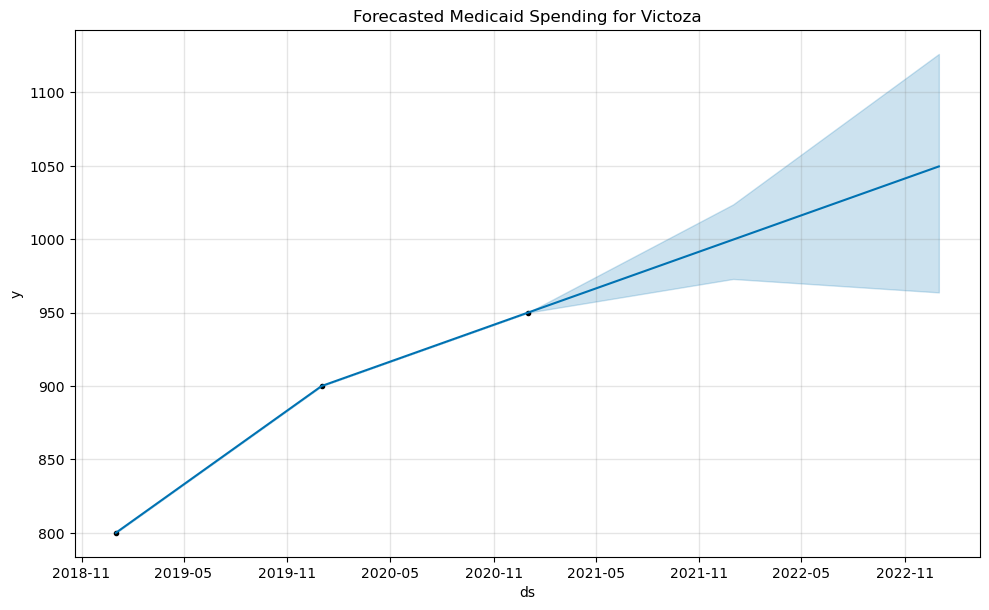

12:44:34 - cmdstanpy - INFO - Chain [1] start processing
12:44:34 - cmdstanpy - INFO - Chain [1] done processing


Forecast for Victoza (last 2 years):
          ds         yhat  yhat_lower   yhat_upper
3 2021-12-31   999.726778  972.921978  1023.718261
4 2022-12-31  1049.590168  963.773226  1126.230246


C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


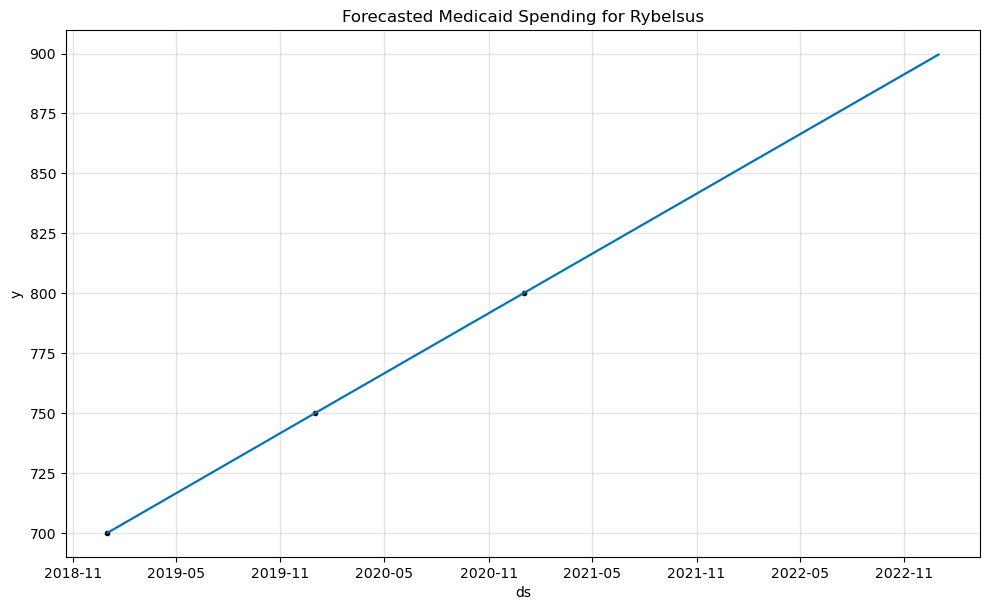

12:44:35 - cmdstanpy - INFO - Chain [1] start processing


Forecast for Rybelsus (last 2 years):
          ds        yhat  yhat_lower  yhat_upper
3 2021-12-31  849.726773  849.664212  849.793771
4 2022-12-31  899.590159  899.381915  899.827388


12:44:36 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


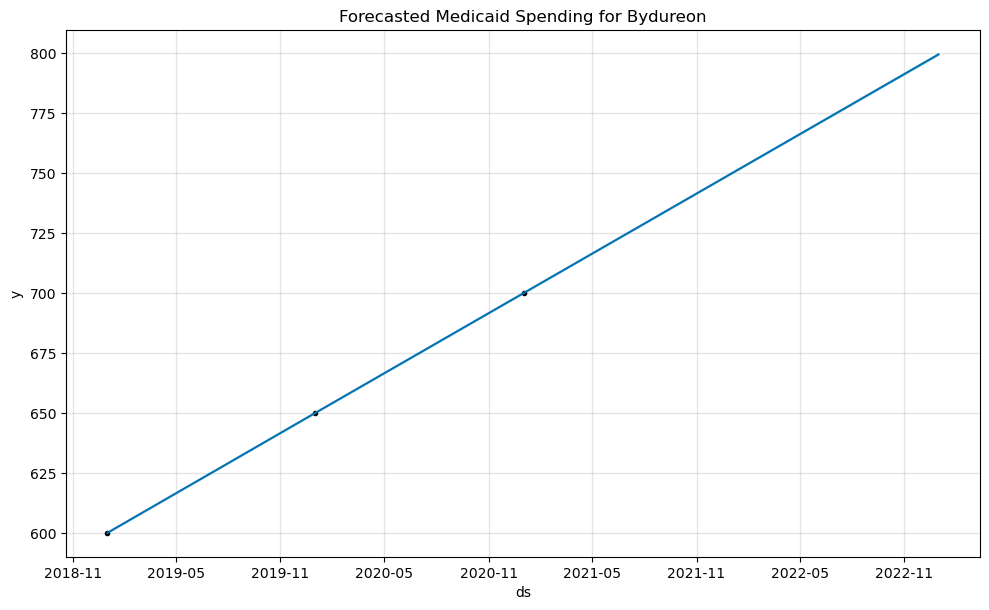

12:44:36 - cmdstanpy - INFO - Chain [1] start processing


Forecast for Bydureon (last 2 years):
          ds        yhat  yhat_lower  yhat_upper
3 2021-12-31  749.726780  749.672431  749.781735
4 2022-12-31  799.590169  799.405292  799.775474


12:44:37 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


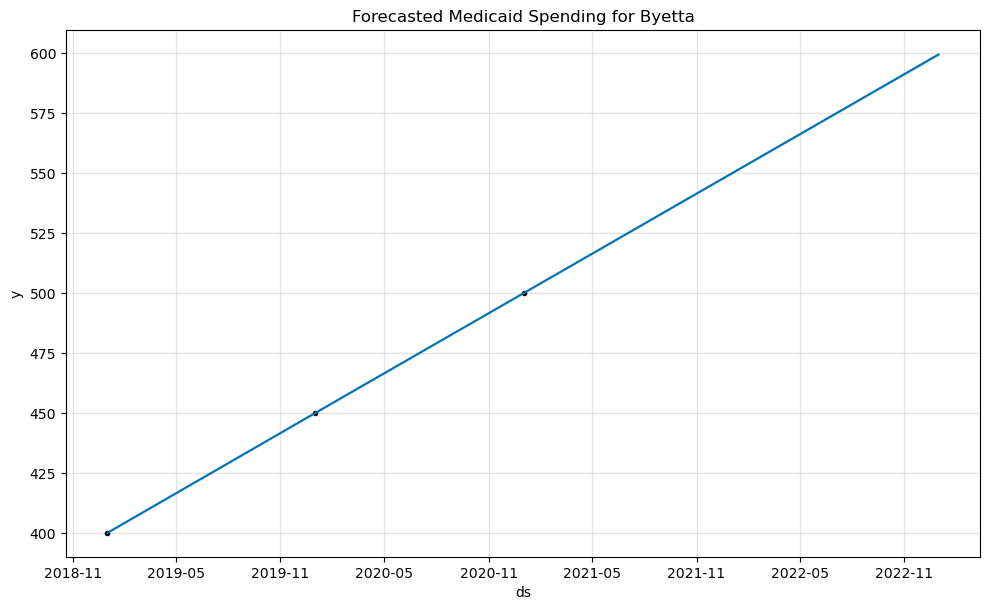

12:44:38 - cmdstanpy - INFO - Chain [1] start processing
12:44:38 - cmdstanpy - INFO - Chain [1] done processing


Forecast for Byetta (last 2 years):
          ds        yhat  yhat_lower  yhat_upper
3 2021-12-31  549.726774  549.661957  549.792303
4 2022-12-31  599.590161  599.382809  599.813440


C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


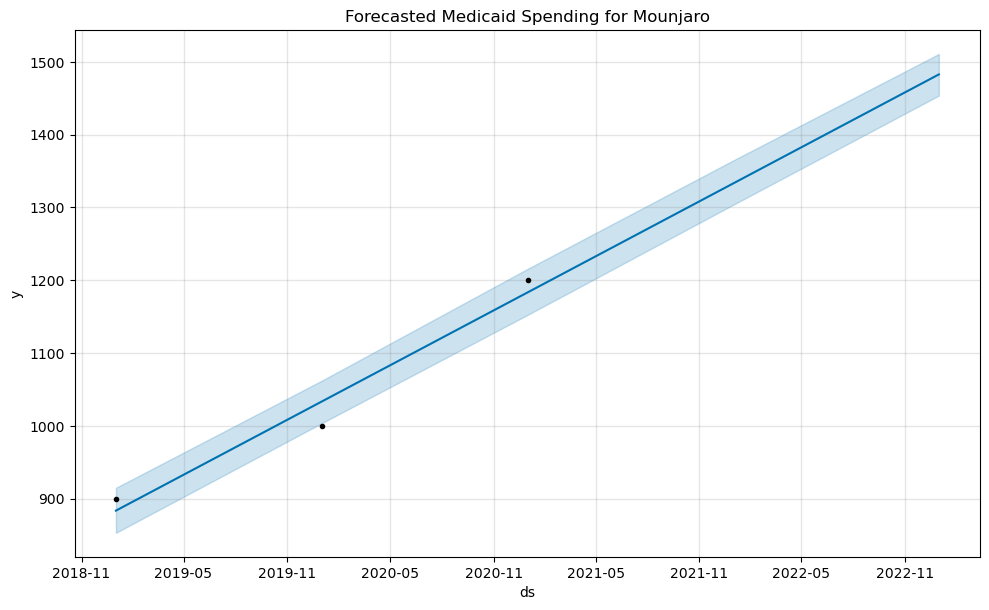

12:44:38 - cmdstanpy - INFO - Chain [1] start processing


Forecast for Mounjaro (last 2 years):
          ds         yhat   yhat_lower   yhat_upper
3 2021-12-31  1332.827641  1303.510366  1364.475103
4 2022-12-31  1482.647178  1453.583188  1510.794764


12:44:39 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


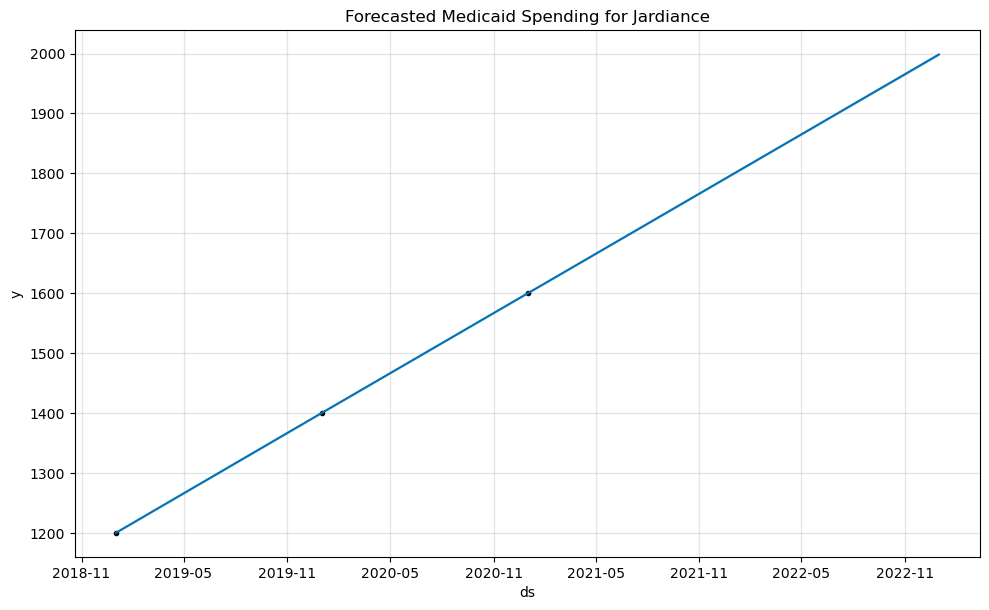

12:44:40 - cmdstanpy - INFO - Chain [1] start processing
12:44:40 - cmdstanpy - INFO - Chain [1] done processing


Forecast for Jardiance (last 2 years):
          ds         yhat   yhat_lower   yhat_upper
3 2021-12-31  1798.907114  1798.666775  1799.179036
4 2022-12-31  1998.360669  1997.483132  1999.264643


C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


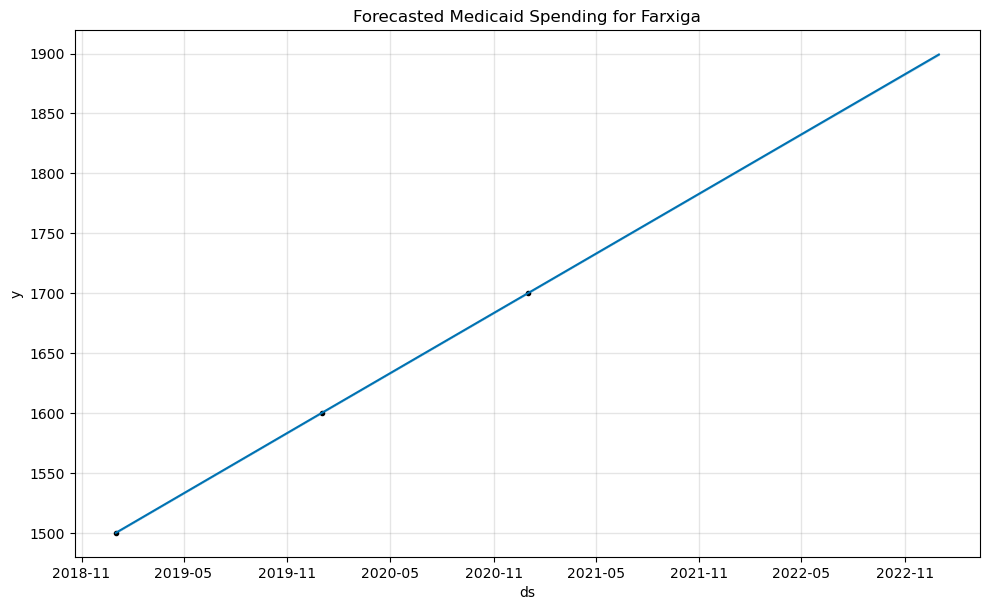

12:44:40 - cmdstanpy - INFO - Chain [1] start processing
12:44:40 - cmdstanpy - INFO - Chain [1] done processing


Forecast for Farxiga (last 2 years):
          ds         yhat   yhat_lower   yhat_upper
3 2021-12-31  1799.453552  1799.343956  1799.598917
4 2022-12-31  1899.180329  1898.799494  1899.671299


C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


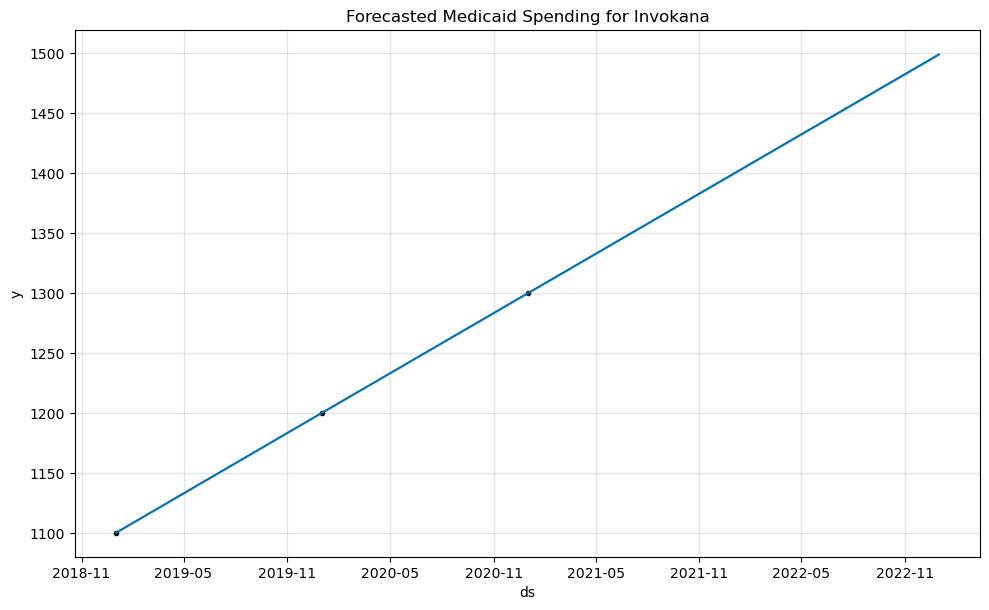

12:44:40 - cmdstanpy - INFO - Chain [1] start processing


Forecast for Invokana (last 2 years):
          ds         yhat   yhat_lower   yhat_upper
3 2021-12-31  1399.453553  1399.328096  1399.582101
4 2022-12-31  1499.180328  1498.721970  1499.615643


12:44:42 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


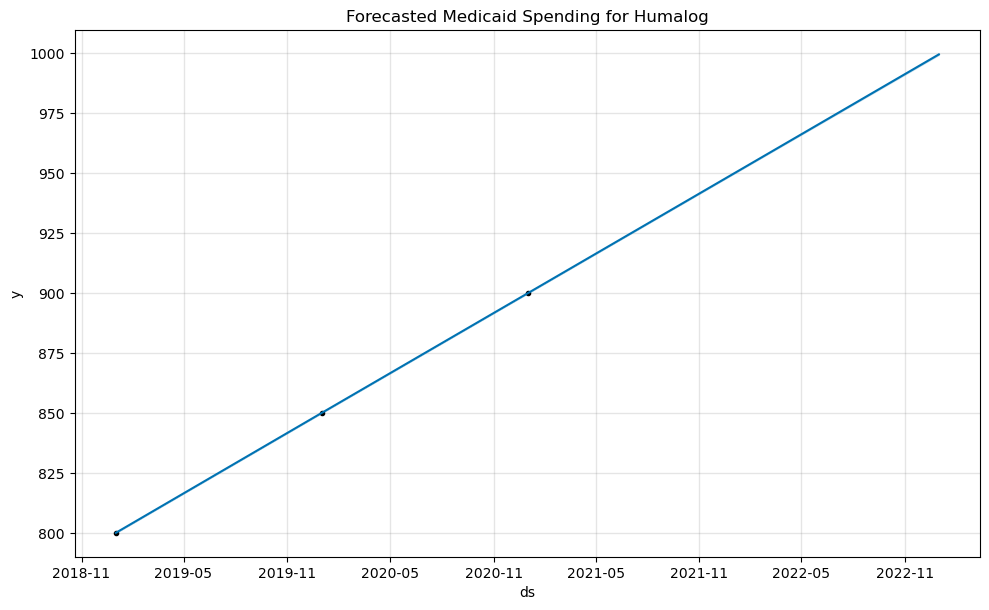

12:44:42 - cmdstanpy - INFO - Chain [1] start processing


Forecast for Humalog (last 2 years):
          ds        yhat  yhat_lower  yhat_upper
3 2021-12-31  949.726779  949.662649  949.784423
4 2022-12-31  999.590168  999.386555  999.784566


12:44:44 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


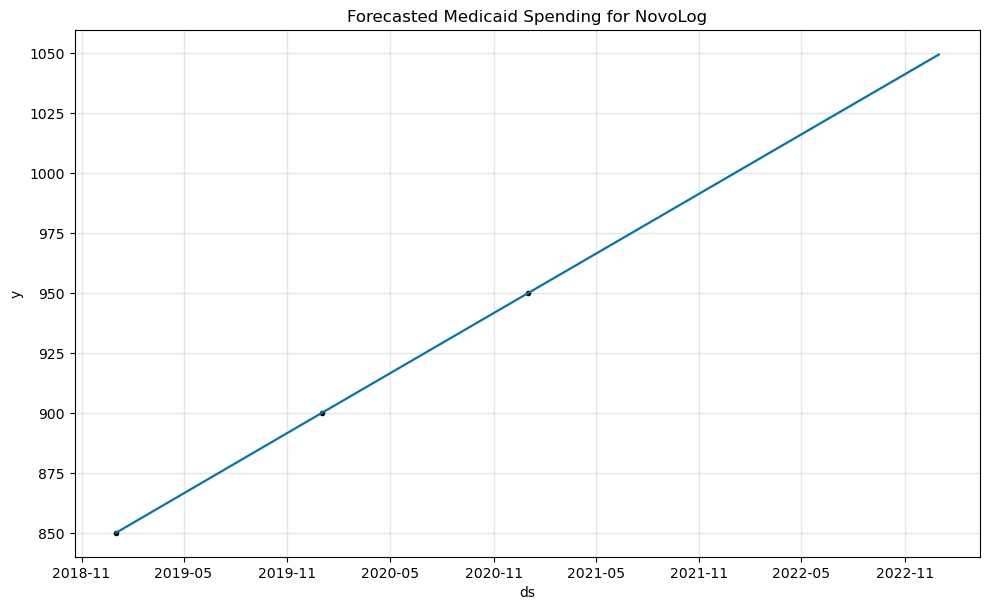

12:44:44 - cmdstanpy - INFO - Chain [1] start processing


Forecast for NovoLog (last 2 years):
          ds         yhat   yhat_lower   yhat_upper
3 2021-12-31   999.726768   999.662390   999.788166
4 2022-12-31  1049.590154  1049.380204  1049.789022


12:44:45 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


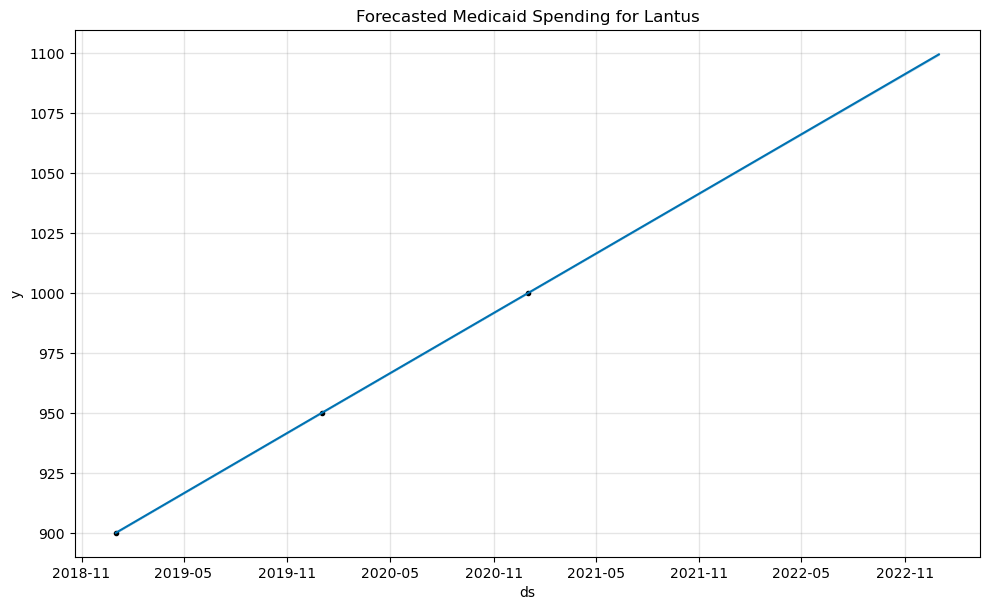

12:44:45 - cmdstanpy - INFO - Chain [1] start processing
12:44:45 - cmdstanpy - INFO - Chain [1] done processing


Forecast for Lantus (last 2 years):
          ds         yhat   yhat_lower   yhat_upper
3 2021-12-31  1049.726781  1049.667659  1049.784586
4 2022-12-31  1099.590171  1099.383024  1099.774499


C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


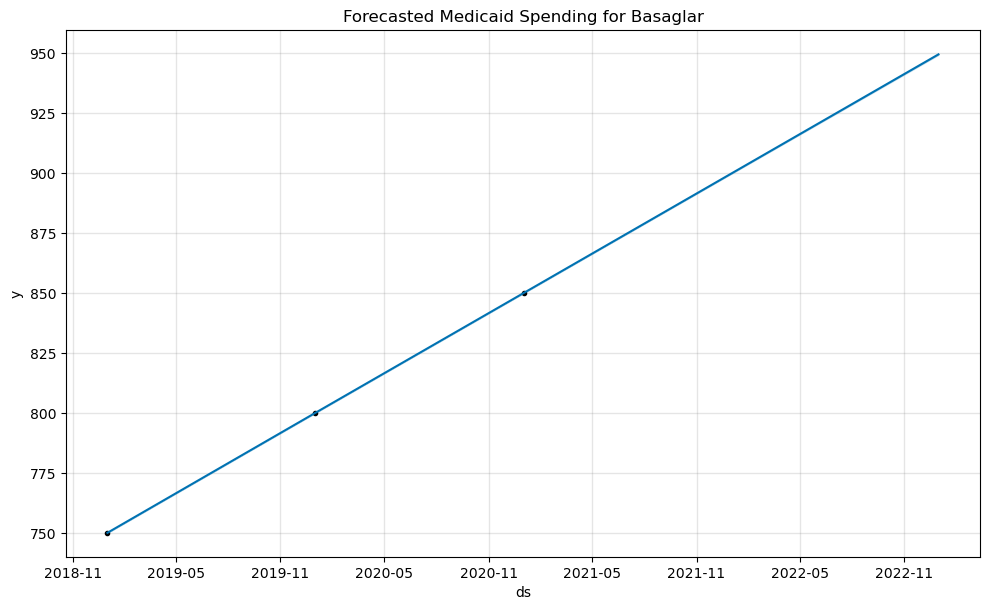

12:44:45 - cmdstanpy - INFO - Chain [1] start processing


Forecast for Basaglar (last 2 years):
          ds        yhat  yhat_lower  yhat_upper
3 2021-12-31  899.726776  899.659722  899.776239
4 2022-12-31  949.590164  949.386372  949.776316


12:44:47 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


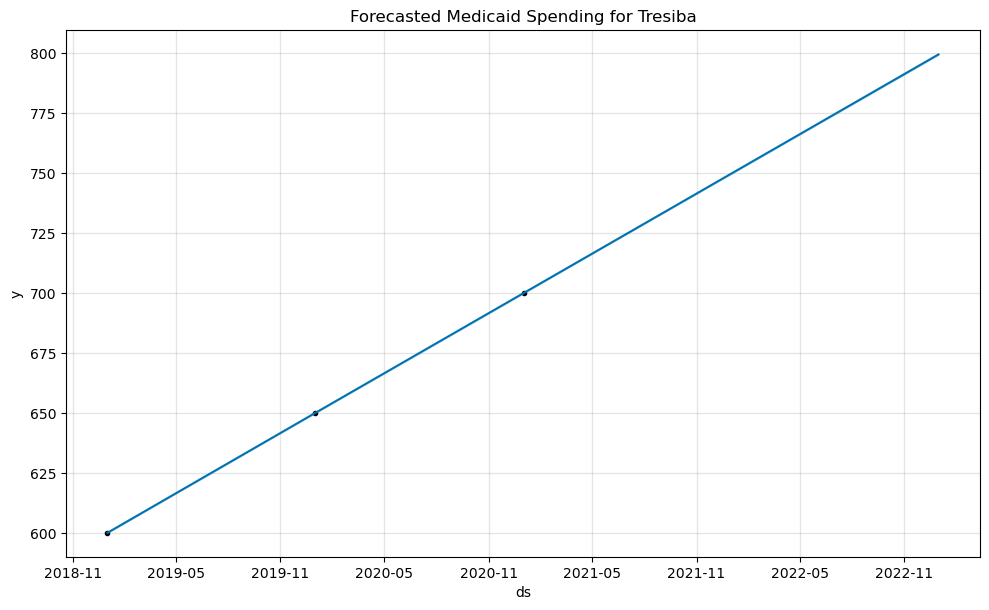

12:44:47 - cmdstanpy - INFO - Chain [1] start processing


Forecast for Tresiba (last 2 years):
          ds        yhat  yhat_lower  yhat_upper
3 2021-12-31  749.726780  749.663225   749.78776
4 2022-12-31  799.590169  799.383809   799.79705


12:44:48 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


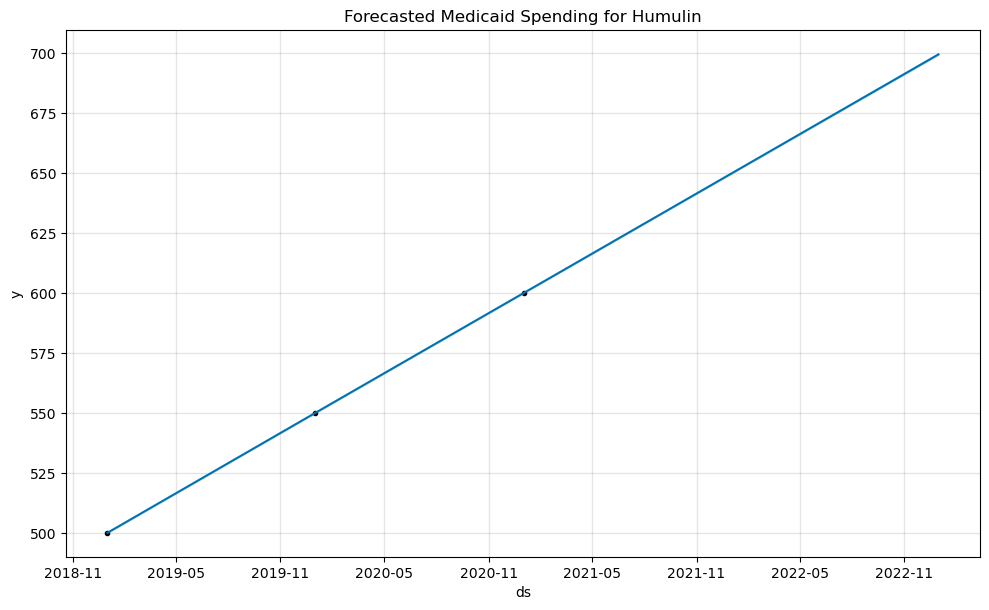

12:44:48 - cmdstanpy - INFO - Chain [1] start processing


Forecast for Humulin (last 2 years):
          ds        yhat  yhat_lower  yhat_upper
3 2021-12-31  649.726776  649.667903  649.782799
4 2022-12-31  699.590165  699.372327  699.767706


12:44:49 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


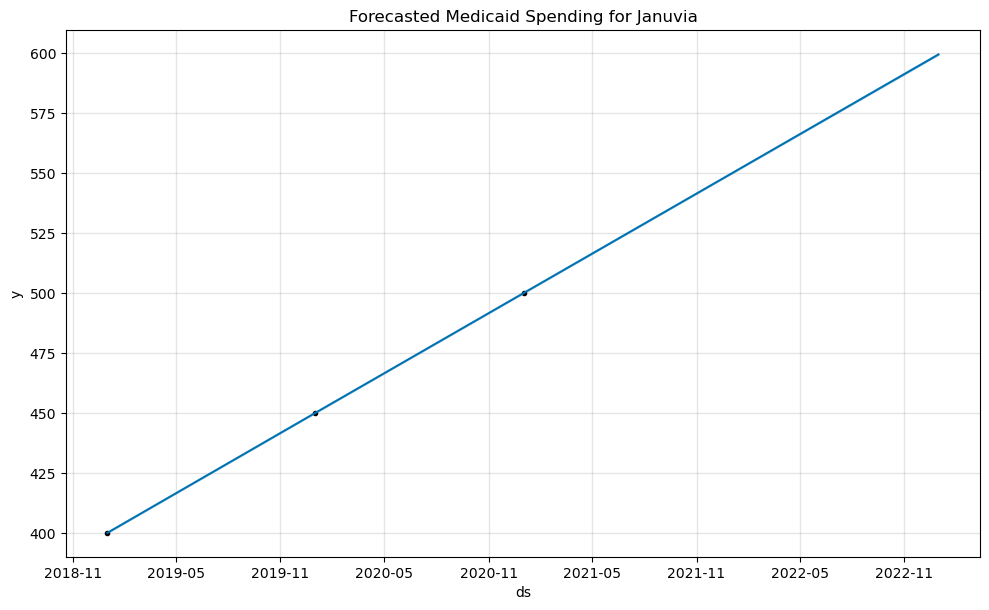

12:44:49 - cmdstanpy - INFO - Chain [1] start processing


Forecast for Januvia (last 2 years):
          ds        yhat  yhat_lower  yhat_upper
3 2021-12-31  549.726774  549.664673  549.788950
4 2022-12-31  599.590161  599.372322  599.797167


12:44:51 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


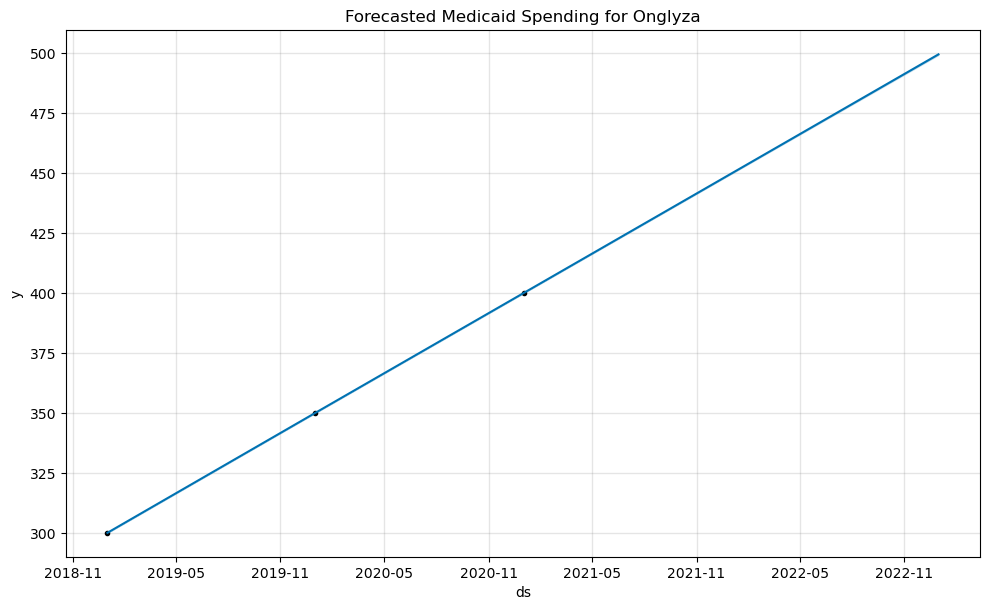

12:44:51 - cmdstanpy - INFO - Chain [1] start processing


Forecast for Onglyza (last 2 years):
          ds        yhat  yhat_lower  yhat_upper
3 2021-12-31  449.726778  449.648383  449.780285
4 2022-12-31  499.590167  499.345060  499.771784


12:44:52 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


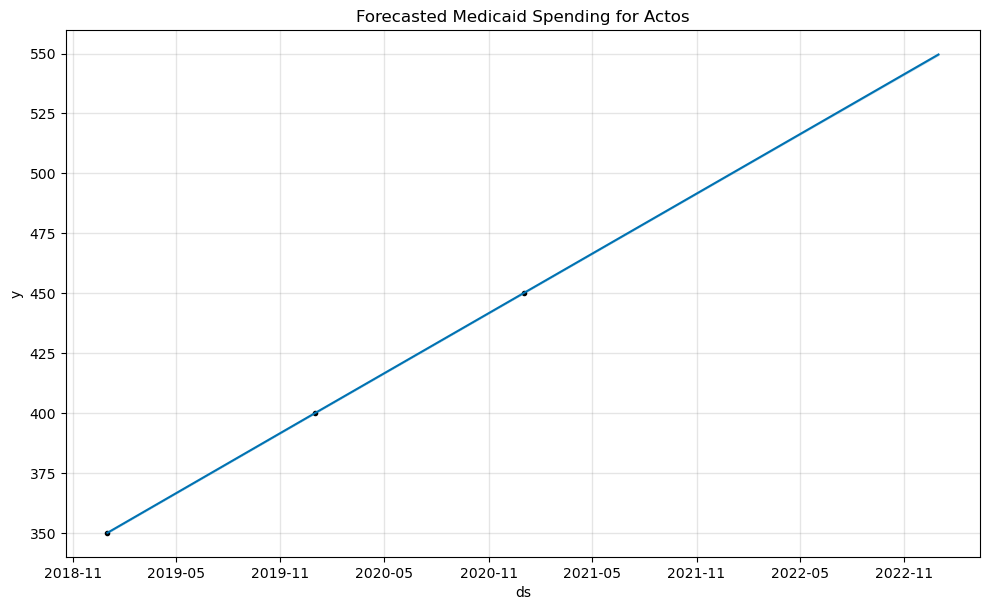

12:44:53 - cmdstanpy - INFO - Chain [1] start processing
12:44:53 - cmdstanpy - INFO - Chain [1] done processing


Forecast for Actos (last 2 years):
          ds        yhat  yhat_lower  yhat_upper
3 2021-12-31  499.726780  499.661991  499.796092
4 2022-12-31  549.590168  549.375567  549.826657


C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


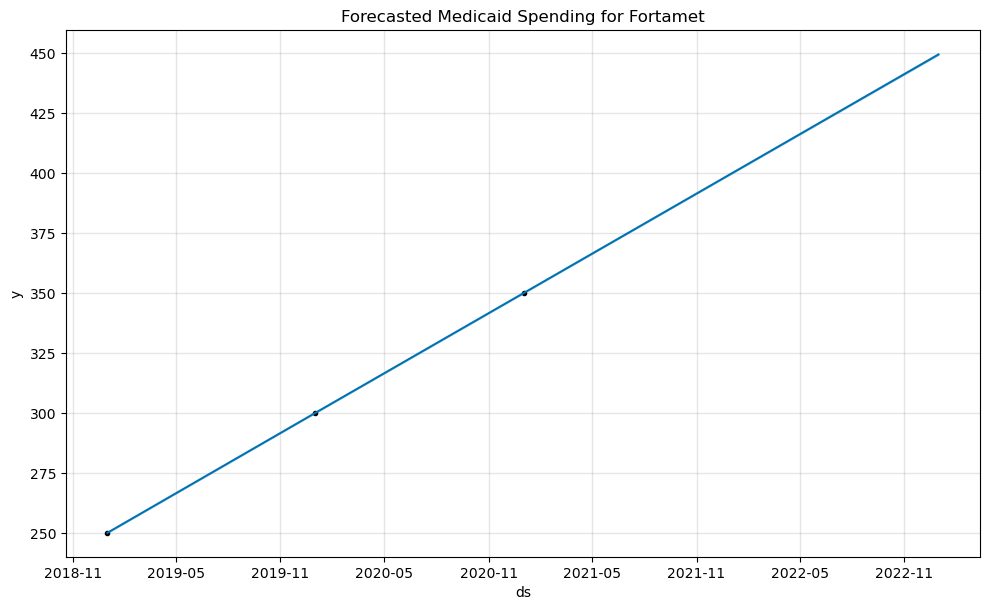

12:44:53 - cmdstanpy - INFO - Chain [1] start processing


Forecast for Fortamet (last 2 years):
          ds        yhat  yhat_lower  yhat_upper
3 2021-12-31  399.726777  399.659010  399.792847
4 2022-12-31  449.590166  449.362834  449.811186


12:44:53 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


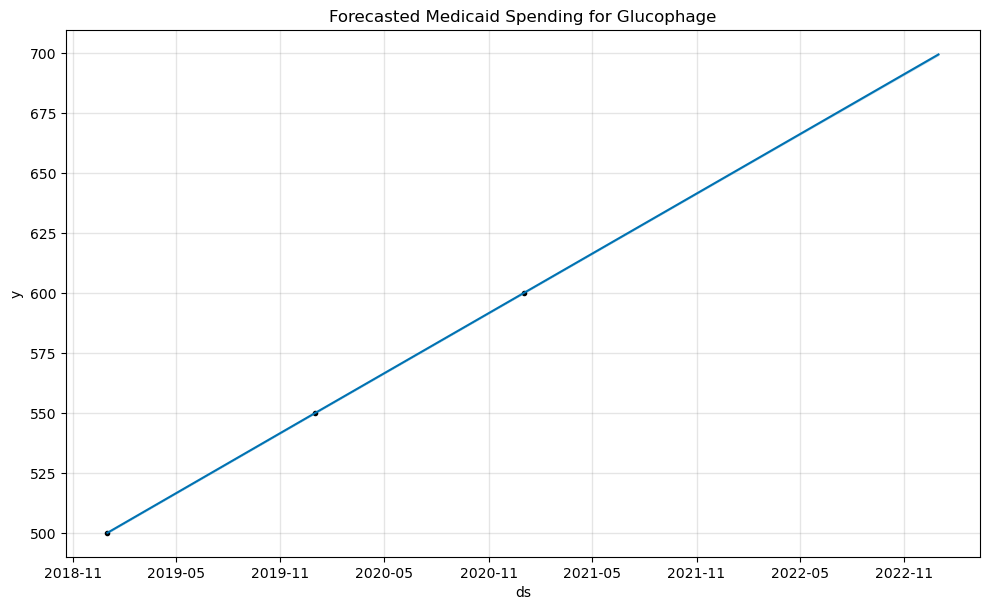

12:44:54 - cmdstanpy - INFO - Chain [1] start processing


Forecast for Glucophage (last 2 years):
          ds        yhat  yhat_lower  yhat_upper
3 2021-12-31  649.726776  649.654273  649.792581
4 2022-12-31  699.590165  699.357339  699.805390


12:44:55 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


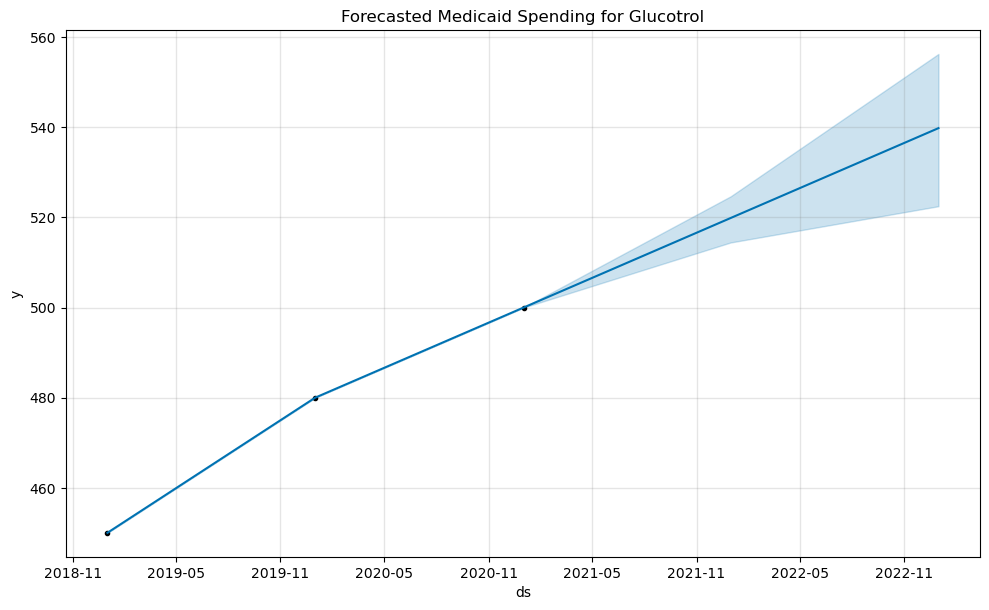

12:44:55 - cmdstanpy - INFO - Chain [1] start processing


Forecast for Glucotrol (last 2 years):
          ds        yhat  yhat_lower  yhat_upper
3 2021-12-31  519.890708  514.456835  524.707828
4 2022-12-31  539.836062  522.504039  556.313066


12:44:57 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


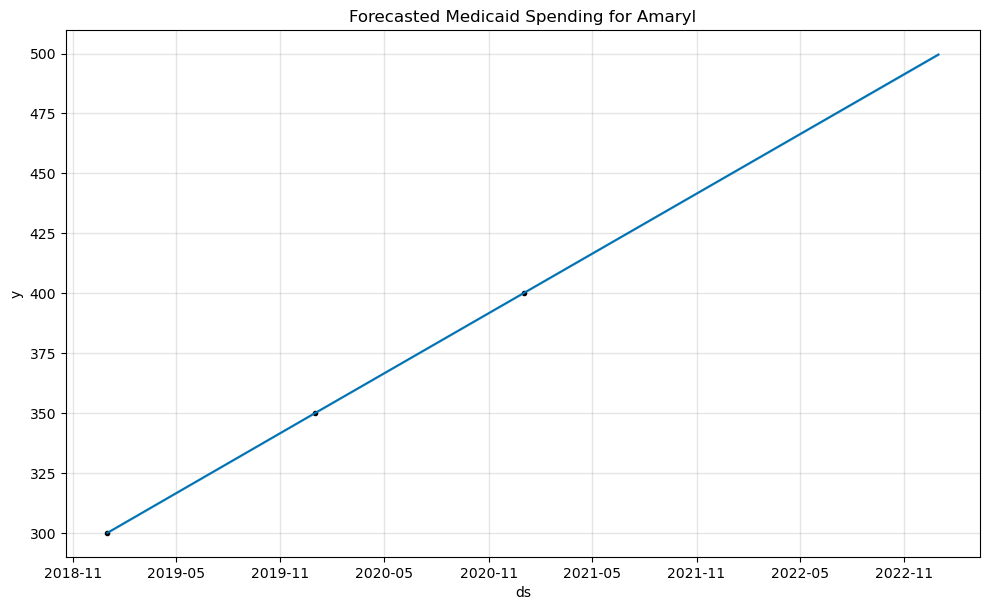

Forecast for Amaryl (last 2 years):
          ds        yhat  yhat_lower  yhat_upper
3 2021-12-31  449.726778  449.661483  449.792325
4 2022-12-31  499.590167  499.373777  499.818821


In [29]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Forecast horizon: next 2 years
future_years = 2

def forecast_drug(df_drug, periods=future_years):
    m = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
    m.fit(df_drug[['ds','y']])
    future = m.make_future_dataframe(periods=periods, freq='Y')
    forecast = m.predict(future)
    
    # Plot forecast
    fig = m.plot(forecast)
    plt.title(f"Forecasted Medicaid Spending for {df_drug['Brnd_Name'].iloc[0]}")
    plt.show()
    
    return forecast[['ds','yhat','yhat_lower','yhat_upper']]

# Forecast all diabetes drugs
forecast_results = {}
for drug in df_long['Brnd_Name'].unique():
    df_drug = df_long[df_long['Brnd_Name'] == drug]
    forecast_results[drug] = forecast_drug(df_drug)
    print(f"Forecast for {drug} (last {future_years} years):")
    print(forecast_results[drug].tail(future_years))

12:47:31 - cmdstanpy - INFO - Chain [1] start processing
12:47:32 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\prince\Downloads\anacoda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


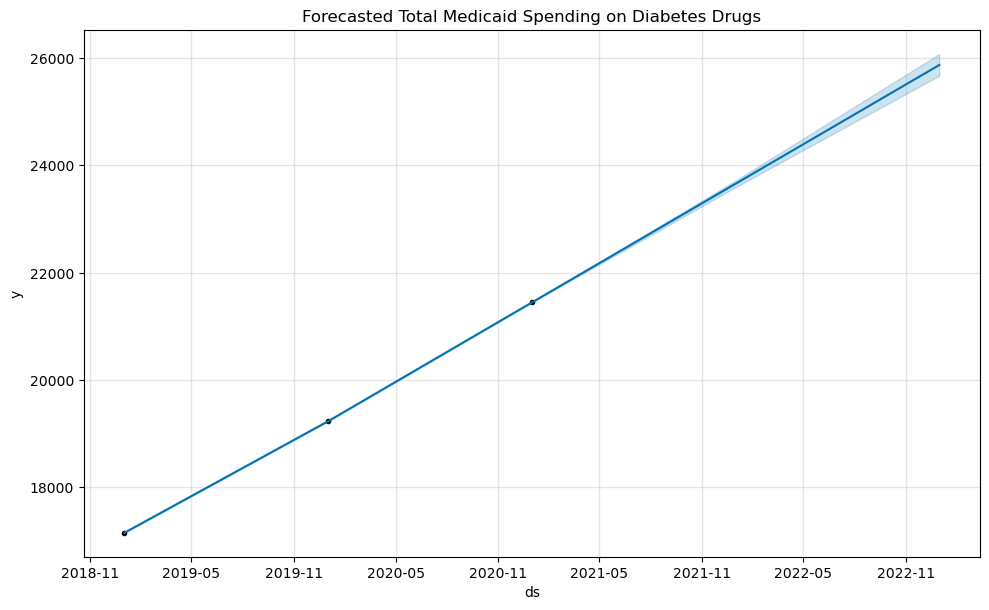

In [30]:
# Aggregate total spending per year
df_total = df_long.groupby('Year')['Total_Spending'].sum().reset_index()
df_total['ds'] = pd.to_datetime(df_total['Year'], format='%Y')
df_total['y'] = df_total['Total_Spending']

# Forecast total spending
m_total = Prophet(yearly_seasonality=False)
m_total.fit(df_total[['ds','y']])
future_total = m_total.make_future_dataframe(periods=future_years, freq='Y')
forecast_total = m_total.predict(future_total)

# Plot total spending forecast
fig = m_total.plot(forecast_total)
plt.title("Forecasted Total Medicaid Spending on Diabetes Drugs")
plt.show()

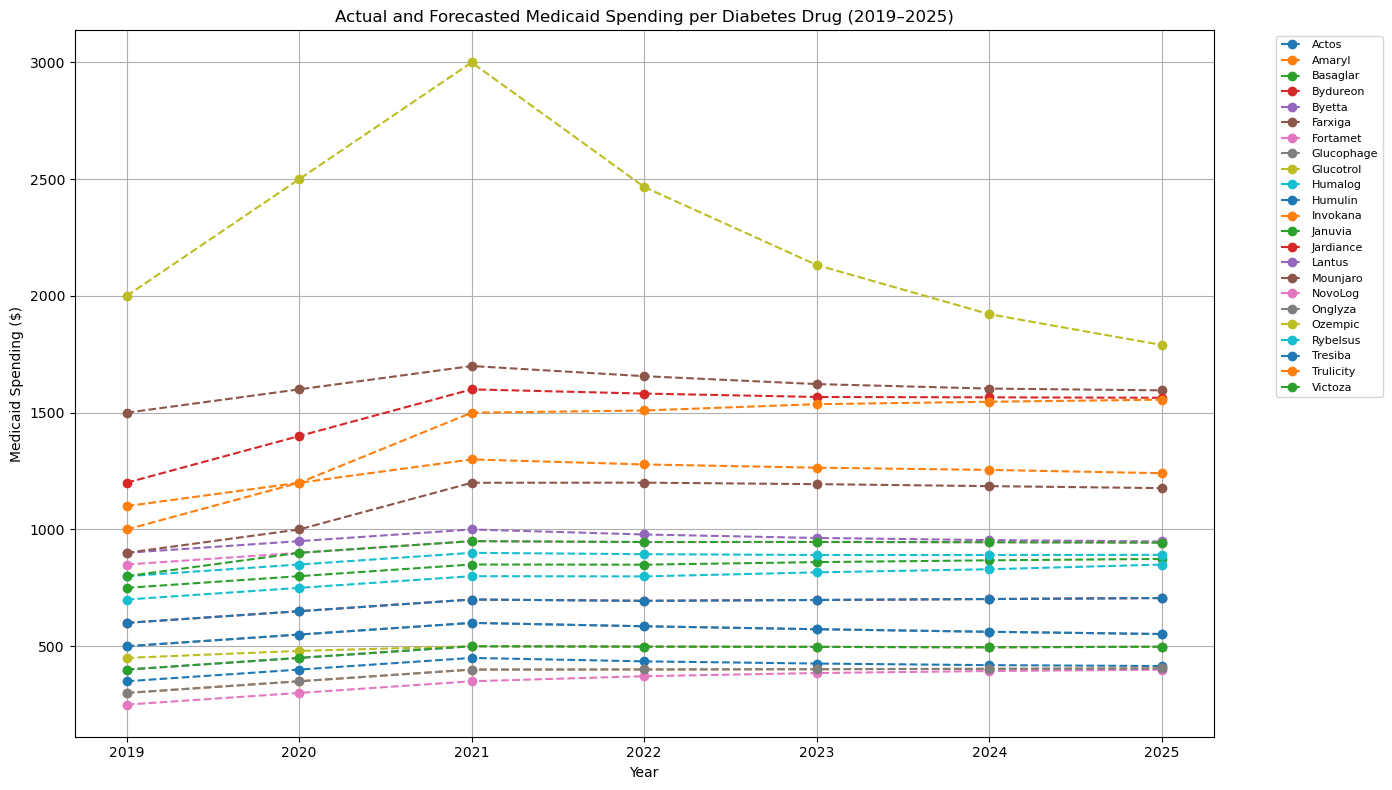

Medicaid spending and YoY growth (2019–2025):
    Brnd_Name  Year  Total_Spending  YoY_Change_%
18      Actos  2019      350.000000           NaN
41      Actos  2020      400.000000     14.285714
64      Actos  2021      450.000000     12.500000
87      Actos  2022      435.250000     -3.277778
110     Actos  2023      425.846250     -2.160540
..        ...   ...             ...           ...
48    Victoza  2021      950.000000      5.555556
71    Victoza  2022      946.250000     -0.394737
94    Victoza  2023      946.461250      0.022325
117   Victoza  2024      945.393081     -0.112859
140   Victoza  2025      943.760661     -0.172671

[161 rows x 4 columns]


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# --------------------------
# 1. Sample dataset
# --------------------------
data = {
    "Brnd_Name": [
        "Trulicity","Ozempic","Victoza","Rybelsus","Bydureon","Byetta","Mounjaro",
        "Jardiance","Farxiga","Invokana","Humalog","NovoLog","Lantus","Basaglar","Tresiba","Humulin",
        "Januvia","Onglyza","Actos","Fortamet","Glucophage","Glucotrol","Amaryl","Tylenol"
    ],
    "Tot_Spndng_2019": [
        1000, 2000, 800, 700, 600, 400, 900,
        1200, 1500, 1100, 800, 850, 900, 750, 600, 500,
        400, 300, 350, 250, 500, 450, 300, 500
    ],
    "Tot_Spndng_2020": [
        1200, 2500, 900, 750, 650, 450, 1000,
        1400, 1600, 1200, 850, 900, 950, 800, 650, 550,
        450, 350, 400, 300, 550, 480, 350, 550
    ],
    "Tot_Spndng_2021": [
        1500, 3000, 950, 800, 700, 500, 1200,
        1600, 1700, 1300, 900, 950, 1000, 850, 700, 600,
        500, 400, 450, 350, 600, 500, 400, 600
    ]
}

df = pd.DataFrame(data)

# Diabetes drug list
diabetes_brands = [
    "Trulicity","Ozempic","Victoza","Rybelsus","Bydureon","Byetta","Mounjaro",
    "Jardiance","Farxiga","Invokana",
    "Humalog","NovoLog","Lantus","Basaglar","Tresiba","Humulin",
    "Januvia","Onglyza","Actos","Fortamet","Glucophage","Glucotrol","Amaryl"
]

# Filter only diabetes drugs
df_diabetes = df[df['Brnd_Name'].isin(diabetes_brands)].copy()

# --------------------------
# 2. Initialize forecast columns
# --------------------------
forecast_years = [2022, 2023, 2024, 2025]
for year in forecast_years:
    df_diabetes[f'Forecast_{year}'] = np.nan

# --------------------------
# 3. Train and predict year-by-year
# --------------------------
years = [2019, 2020, 2021] + forecast_years

for i in range(len(years)-1):
    year_prev = years[i]
    year_next = years[i+1]
    
    col_prev = f"Tot_Spndng_{year_prev}" if year_prev <= 2021 else f"Forecast_{year_prev}"
    col_next = f"Forecast_{year_next}"
    
    # Target variable
    if year_prev == 2019:
        y = df_diabetes['Tot_Spndng_2020']
    elif year_prev == 2020:
        y = df_diabetes['Tot_Spndng_2021']
    else:
        y = df_diabetes[col_prev]
    
    # Train Random Forest
    X = df_diabetes[[col_prev]]
    rf = RandomForestRegressor(n_estimators=200, random_state=42)
    rf.fit(X, y)
    
    # Predict next year
    df_diabetes[col_next] = rf.predict(X)

# --------------------------
# 4. Melt to long format (2019-2025)
# --------------------------
value_cols = ['Tot_Spndng_2019','Tot_Spndng_2020','Tot_Spndng_2021'] + [f'Forecast_{y}' for y in forecast_years]

df_long = df_diabetes.melt(
    id_vars=['Brnd_Name'],
    value_vars=value_cols,
    var_name='Year',
    value_name='Total_Spending'
)

# Clean Year column
df_long['Year'] = df_long['Year'].str.extract(r'(\d{4})').astype(int)

# Sort
df_long.sort_values(['Brnd_Name','Year'], inplace=True)

# --------------------------
# 5. Compute YoY growth for all years
# --------------------------
df_long['YoY_Change_%'] = df_long.groupby('Brnd_Name')['Total_Spending'].pct_change() * 100

# --------------------------
# 6. Plot actual + forecast
# --------------------------
plt.figure(figsize=(14,8))
for drug in df_long['Brnd_Name'].unique():
    df_drug = df_long[df_long['Brnd_Name'] == drug]
    plt.plot(df_drug['Year'], df_drug['Total_Spending'], marker='o', linestyle='--', label=drug)

plt.xlabel("Year")
plt.ylabel("Medicaid Spending ($)")
plt.title("Actual and Forecasted Medicaid Spending per Diabetes Drug (2019–2025)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

# --------------------------
# 7. View dataframe with YoY growth
# --------------------------
print("Medicaid spending and YoY growth (2019–2025):")
print(df_long)
